In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [27]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[ 1.96201619,  3.98876774,  1.7611242 , -1.54657643, -1.52258023,
         1.5976714 ,  1.85243765,  3.10623284, -0.07276602, -1.94040374],
       [-0.7924242 , -0.25408669, -0.71503769,  0.27172135,  0.19494413,
        -0.04202813,  0.09373078,  0.49372102,  0.3013605 , -0.13532785]])

In [28]:
test_Features[:2]

array([[-0.70172164, -1.20890555, -1.62936819,  1.8236199 ,  1.52607076,
         0.0954935 , -0.40327917, -0.01198575,  1.51661851,  0.04567084],
       [ 0.48873507, -0.6433686 ,  0.34699073, -0.50887761, -0.56427765,
         0.61983366,  0.64106743, -0.36236929,  0.20668532, -0.22810607]])

In [29]:
train_Label[:4]

array([0, 1, 1, 1])

In [30]:
train_Features.shape

(15216, 10)

In [31]:
test_Label[:4]

array([1, 0, 1, 0])

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [33]:
model = Sequential()

In [34]:
model.add(Dense(units=10*6,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [35]:
model.add(Dense(units=10*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [36]:
model.add(Dense(units=10*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [37]:
model.add(Dense(units=10*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [38]:
model.add(Dense(units=10*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [39]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [40]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total para

In [42]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6905 - acc: 0.6358 - val_loss: 0.6869 - val_acc: 0.6531
Epoch 2/30
 - 0s - loss: 0.6819 - acc: 0.6457 - val_loss: 0.6646 - val_acc: 0.6531
Epoch 3/30
 - 0s - loss: 0.5741 - acc: 0.6457 - val_loss: 0.5086 - val_acc: 0.6531
Epoch 4/30
 - 0s - loss: 0.4745 - acc: 0.7470 - val_loss: 0.4504 - val_acc: 0.7845
Epoch 5/30
 - 0s - loss: 0.3987 - acc: 0.8209 - val_loss: 0.4001 - val_acc: 0.8239
Epoch 6/30
 - 1s - loss: 0.3768 - acc: 0.8421 - val_loss: 0.3865 - val_acc: 0.8384
Epoch 7/30
 - 1s - loss: 0.3664 - acc: 0.8491 - val_loss: 0.3821 - val_acc: 0.8357
Epoch 8/30
 - 1s - loss: 0.3566 - acc: 0.8555 - val_loss: 0.3661 - val_acc: 0.8555
Epoch 9/30
 - 1s - loss: 0.3556 - acc: 0.8554 - val_loss: 0.3637 - val_acc: 0.8535
Epoch 10/30
 - 1s - loss: 0.3468 - acc: 0.8604 - val_loss: 0.3563 - val_acc: 0.8515
Epoch 11/30
 - 1s - loss: 0.3423 - acc: 0.8599 - val_loss: 0.3482 - val_acc: 0.8594
Epoch 12/30
 - 1s - loss: 0.3389 - a

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

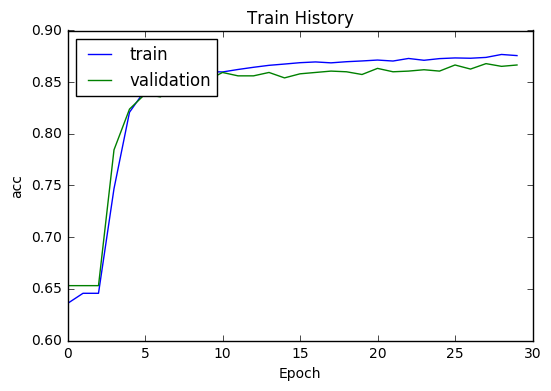

In [45]:
show_train_history(train_history,'acc','val_acc')

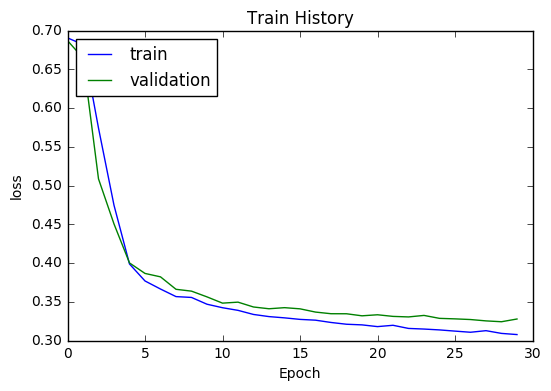

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 1s 132us/step


In [48]:
scores[1]

0.8677707674250117